<a href="https://colab.research.google.com/github/Devu17/sample/blob/master/churn%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

In [10]:
summary = data.describe(include=["O"])
summary

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2868-SNELZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [11]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [0]:
data.dropna(how="any",inplace=True)

In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_continuous = scaler.fit_transform(data[data_cont])

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for cols in data_cat:
    data.loc[:,cols] = LabelEncoder().fit_transform(data.loc[:,cols])

onehotencoder = OneHotEncoder(sparse=False)
data_categorical = onehotencoder.fit_transform(data[data_cat])

In [17]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [0]:
import warnings
warnings.filterwarnings("ignore")
features = np.concatenate([data_continuous, data_categorical], axis=1)

target = data.iloc[:,20:].values
target = LabelEncoder().fit_transform(target)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [0]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()

In [0]:
from keras.layers.normalization import BatchNormalization
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 46))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

In [0]:
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))

In [0]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
classifier.add(Dropout(0.2))

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100)

Epoch 1/100
5625/5625 [==============================] - 1s 158us/step - loss: 1.7851 - accuracy: 0.6411
Epoch 2/100
5625/5625 [==============================] - 0s 19us/step - loss: 1.4652 - accuracy: 0.5911
Epoch 3/100
5625/5625 [==============================] - 0s 20us/step - loss: 1.4121 - accuracy: 0.6100
Epoch 4/100
5625/5625 [==============================] - 0s 20us/step - loss: 1.3913 - accuracy: 0.6276
Epoch 5/100
5625/5625 [==============================] - 0s 20us/step - loss: 1.4112 - accuracy: 0.6196
Epoch 6/100
5625/5625 [==============================] - 0s 21us/step - loss: 1.3805 - accuracy: 0.6192
Epoch 7/100
5625/5625 [==============================] - 0s 20us/step - loss: 1.2746 - accuracy: 0.6327
Epoch 8/100
5625/5625 [==============================] - 0s 20us/step - loss: 1.3366 - accuracy: 0.6254
Epoch 9/100
5625/5625 [==============================] - 0s 20us/step - loss: 1.3868 - accuracy: 0.6292
Epoch 10/100
5625/5625 [==============================] - 0s 20

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1038
           1       0.00      0.00      0.00       369

    accuracy                           0.74      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.74      0.63      1407



Text(91.68, 0.5, 'predicted label')

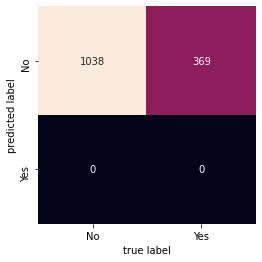

In [70]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T,square=True, annot=True, fmt='d', cbar=False,xticklabels=['No','Yes'],yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')